# Preprocessing and Spike Sorting with SpikeInterface

In [2]:
import os
import requests
import zipfile
import numpy as np
from matplotlib import pyplot as plt
import spikeinterface.full as si
import probeinterface as pi
from probeinterface.plotting import plot_probe

%matplotlib inline

In [3]:
url = "https://uni-bonn.sciebo.de/s/lFAt1OuziUxdMkX/download"

if not os.path.exists("openephys_recording"):
    response = requests.get(url)
    with open("openephys_recording.zip", "wb") as file:
        file.write(response.content)

    with zipfile.ZipFile("openephys_recording.zip", "r") as zip_ref:
        zip_ref.extractall("")
    os.remove("openephys_recording.zip")

## 1 Working with Recordings

SpikeInterface provides extractors for many different formats, for a
full listing see the dictionary stored in
`si.recording_extractor_full_dict`

| Code | Description |
|------------------------------------|------------------------------------|
| `rec = si.read_openephys("/recording/")` | Read data in the Open Ephys format from the folder `"/recording"` and assign the returned object to the variable `rec` |
| `rec.get_num_channels()` | Get the number of channels in the recoding `rec` |
| `rec.get_duration()` | Get the total duration of the recording `rec` |
| `rec.get_sampling_frequency()` | Get the sampling frequency of the recording `rec` |
| `seg = rec.frame_slice(start_frame=0, end_frame=1000)` | Get the first 1000 samples of the recording `rec` and assign them to a new variable `seg` |
| `rec.get_traces(start_frame=i, stop_frame=j)` | Get a numpy array that contains the data recorded between samples `i` and `j` |

------------------------------------------------------------------------

In [4]:
data_dir = "openephys_recording/2023-08-23_15-56-05"

<span class="theorem-title">**Example 1**</span> Load the recording
stream with the id `"1"`, which contains the **auxiliary channels**,
assign the returned `RecordingExtractor` to a variable called `aux_rec`
and print it.

``` python
rec = si.read_openephys(data_dir, stream_id="1")
```

<span class="theorem-title">**Exercise 1**</span> Load the stream with
the id `"0"` and assign the returned `RecordingExtractor` to a variable
called `rec`.

``` python
rec = si.read_openephys(data_dir, stream_id="0")
rec
```

<div style='border:1px solid #ddd; padding:10px;'><strong>OpenEphysBinaryRecordingExtractor: 64 channels - 30.0kHz - 1 segments - 9,000,000 samples - 300.00s (5.00 minutes) - int16 dtype - 1.07 GiB</strong></div><details style='margin-left: 10px;'>  <summary><strong>Channel IDs</strong></summary><ul>['CH1' 'CH2' 'CH3' 'CH4' 'CH5' 'CH6' 'CH7' 'CH8' 'CH9' 'CH10' 'CH11'
 'CH12' 'CH13' 'CH14' 'CH15' 'CH16' 'CH17' 'CH18' 'CH19' 'CH20' 'CH21'
 'CH22' 'CH23' 'CH24' 'CH25' 'CH26' 'CH27' 'CH28' 'CH29' 'CH30' 'CH31'
 'CH32' 'CH33' 'CH34' 'CH35' 'CH36' 'CH37' 'CH38' 'CH39' 'CH40' 'CH41'
 'CH42' 'CH43' 'CH44' 'CH45' 'CH46' 'CH47' 'CH48' 'CH49' 'CH50' 'CH51'
 'CH52' 'CH53' 'CH54' 'CH55' 'CH56' 'CH57' 'CH58' 'CH59' 'CH60' 'CH61'
 'CH62' 'CH63' 'CH64'] </details><details style='margin-left: 10px;'>  <summary><strong>Annotations</strong></summary><ul><li> <strong> is_filtered </strong>: False</li><li> <strong> experiment_name </strong>: experiment1</li></details><details style='margin-left: 10px;'><summary><strong>Properties</strong></summary><ul><details><summary><strong>gain_to_uV</strong></summary>[0.19499999 0.19499999 0.19499999 0.19499999 0.19499999 0.19499999
 0.19499999 0.19499999 0.19499999 0.19499999 0.19499999 0.19499999
 0.19499999 0.19499999 0.19499999 0.19499999 0.19499999 0.19499999
 0.19499999 0.19499999 0.19499999 0.19499999 0.19499999 0.19499999
 0.19499999 0.19499999 0.19499999 0.19499999 0.19499999 0.19499999
 0.19499999 0.19499999 0.19499999 0.19499999 0.19499999 0.19499999
 0.19499999 0.19499999 0.19499999 0.19499999 0.19499999 0.19499999
 0.19499999 0.19499999 0.19499999 0.19499999 0.19499999 0.19499999
 0.19499999 0.19499999 0.19499999 0.19499999 0.19499999 0.19499999
 0.19499999 0.19499999 0.19499999 0.19499999 0.19499999 0.19499999
 0.19499999 0.19499999 0.19499999 0.19499999]</details><details><summary><strong>offset_to_uV</strong></summary>[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]</details><details><summary><strong>physical_unit</strong></summary>['uV' 'uV' 'uV' 'uV' 'uV' 'uV' 'uV' 'uV' 'uV' 'uV' 'uV' 'uV' 'uV' 'uV'
 'uV' 'uV' 'uV' 'uV' 'uV' 'uV' 'uV' 'uV' 'uV' 'uV' 'uV' 'uV' 'uV' 'uV'
 'uV' 'uV' 'uV' 'uV' 'uV' 'uV' 'uV' 'uV' 'uV' 'uV' 'uV' 'uV' 'uV' 'uV'
 'uV' 'uV' 'uV' 'uV' 'uV' 'uV' 'uV' 'uV' 'uV' 'uV' 'uV' 'uV' 'uV' 'uV'
 'uV' 'uV' 'uV' 'uV' 'uV' 'uV' 'uV' 'uV']</details><details><summary><strong>gain_to_physical_unit</strong></summary>[0.19499999 0.19499999 0.19499999 0.19499999 0.19499999 0.19499999
 0.19499999 0.19499999 0.19499999 0.19499999 0.19499999 0.19499999
 0.19499999 0.19499999 0.19499999 0.19499999 0.19499999 0.19499999
 0.19499999 0.19499999 0.19499999 0.19499999 0.19499999 0.19499999
 0.19499999 0.19499999 0.19499999 0.19499999 0.19499999 0.19499999
 0.19499999 0.19499999 0.19499999 0.19499999 0.19499999 0.19499999
 0.19499999 0.19499999 0.19499999 0.19499999 0.19499999 0.19499999
 0.19499999 0.19499999 0.19499999 0.19499999 0.19499999 0.19499999
 0.19499999 0.19499999 0.19499999 0.19499999 0.19499999 0.19499999
 0.19499999 0.19499999 0.19499999 0.19499999 0.19499999 0.19499999
 0.19499999 0.19499999 0.19499999 0.19499999]</details><details><summary><strong>offset_to_physical_unit</strong></summary>[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]</details><details><summary><strong>channel_name</strong></summary>['CH1' 'CH2' 'CH3' 'CH4' 'CH5' 'CH6' 'CH7' 'CH8' 'CH9' 'CH10' 'CH11'
 'CH12' 'CH13' 'CH14' 'CH15' 'CH16' 'CH17' 'CH18' 'CH19' 'CH20' 'CH21'
 'CH22' 'CH23' 'CH24' 'CH25' 'CH26' 'CH27' 'CH28' 'CH29' 'CH30' 'CH31'
 'CH32' 'CH33' 'CH34' 'CH35' 'CH36' 'CH37' 'CH38' 'CH39' 'CH40' 'CH41'
 'CH42' 'CH43' 'CH44' 'CH45' 'CH46' 'CH47' 'CH48' 'CH49' 'CH50' 'CH51'
 'CH52' 'CH53' 'CH54' 'CH55' 'CH56' 'CH57' 'CH58' 'CH59' 'CH60' 'CH61'
 'CH62' 'CH63' 'CH64']</details></ul></details>

<span class="theorem-title">**Exercise 2**</span> Get the duration of
the recording

``` python
rec.get_duration()
```

    300.0

<span class="theorem-title">**Exercise 3**</span> Get the sampling
frequency of the recording and assign it to a variable `fs`

``` python
fs = rec.get_sampling_frequency()
```

<span class="theorem-title">**Example 2**</span> Use the `frame_slice`
method to select the first `10` seconds of the recording `rec`. Assign
the returned object to a new variable `seg` and get it’s duration.

``` python
seg = rec.frame_slice(start_frame=0 * fs, end_frame=10 * fs)
seg.get_duration()
```

    10.000000000000027

<span class="theorem-title">**Exercise 4**</span> Use the `frame_slice`
method to select the first `60` seconds of the recording `rec`. Assign
the returned object to a new variable `seg` and get it’s duration.

``` python
seg = rec.frame_slice(start_frame=0 * fs, end_frame=60 * fs)
seg.get_duration()
```

    60.00000000000003

<span class="theorem-title">**Exercise 5**</span> Use the `frame_slice`
method to select the last `20` seconds of the recording `rec`. Assign
the returned object to a new variable `seg` and get it’s duration.

``` python
seg = rec.frame_slice(start_frame=(rec.get_duration()-20) * fs, end_frame=rec.get_duration() * fs)
seg.get_duration()
```

    19.99999999999997

<span class="theorem-title">**Example 3**</span> Extract the traces for
the recording between `0.5` and `0.7` seconds, assign the returned numpy
array to a variable called `traces`, then print it’s `.shape`.

``` python
t_start = 0.5
t_stop = 0.7
fs = rec.get_sampling_frequency()
traces = rec.get_traces(start_frame=fs * t_start, end_frame=fs * t_stop)
traces.shape
```

    (6000, 64)

<span class="theorem-title">**Example 4**</span> Plot the extracted
`traces` for the first 3 channels

``` python
time = np.linspace(t_start, t_stop, num=len(traces))
plt.plot(time, traces[:,:3])
plt.xlabel("Time [s]")
plt.ylabel("Voltage [muV]")
```

    Text(0, 0.5, 'Voltage [muV]')

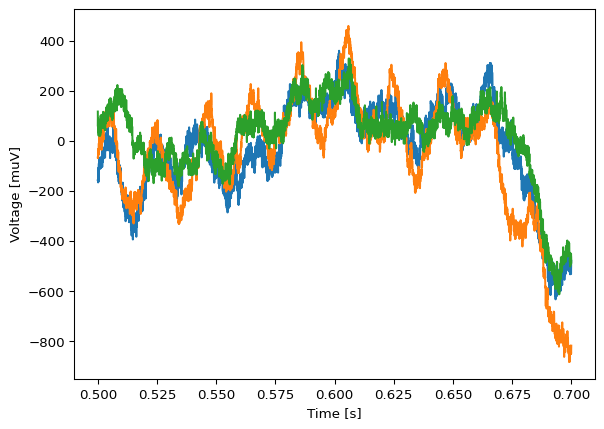

<span class="theorem-title">**Exercise 6**</span> Extract the traces for
the recording between `15` and `20` seconds, assign the returned numpy
array to a variable called `traces`, then print it’s `.shape`.

``` python
t_start = 15
t_stop = 20
fs = rec.get_sampling_frequency()
traces = rec.get_traces(start_frame=int(fs * t_start), end_frame=int(fs * t_stop))
traces.shape
```

    (150000, 64)

<span class="theorem-title">**Exercise 7**</span> Extract the traces for
the recording between `60.1` and `60.2` seconds, assign the returned
numpy array to a variable called `traces`, then print it’s `.shape`.

``` python
t_start = 60.1
t_stop = 60.2
fs = rec.get_sampling_frequency()
traces = rec.get_traces(start_frame=int(fs * t_start), end_frame=int(fs * t_stop))
traces.shape
```

    (3000, 64)

<span class="theorem-title">**Exercise 8**</span> Plot the extracted
`traces` from <a href="#exr-extract" class="quarto-xref">Exercise 7</a>
for channel 7

``` python
time = np.linspace(t_start, t_stop, num=len(traces))
plt.plot(time, traces[:,7])
plt.xlabel("Time [s]")
plt.ylabel("Voltage [muV]")
```

    Text(0, 0.5, 'Voltage [muV]')

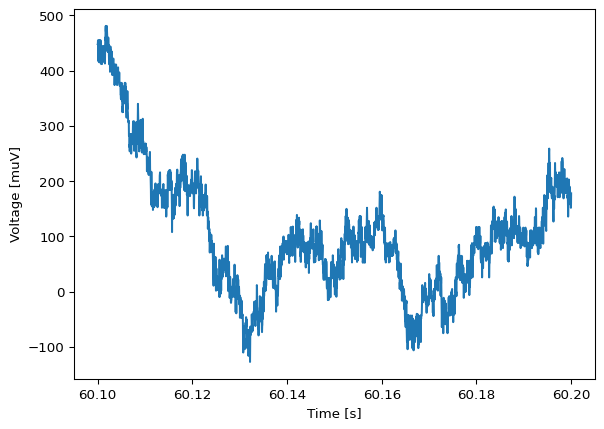

<span class="theorem-title">**Exercise 9**</span> Plot the extracted
`traces` from <a href="#exr-extract" class="quarto-xref">Exercise 7</a>
for the last 5 channels

``` python
time = np.linspace(t_start, t_stop, num=len(traces))
plt.plot(time, traces[:,-5:])
plt.xlabel("Time [s]")
plt.ylabel("Voltage [muV]")
```

    Text(0, 0.5, 'Voltage [muV]')

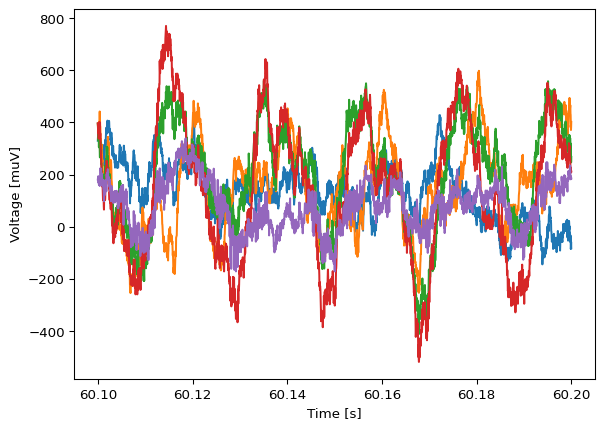

## 2 Handling Probe Information

| Code | Description |
|------------------------------------|------------------------------------|
| `probe = pi.get_probe("neuropixels", probe="NP2014")` | Get the `"NP2014"` probe from `"neuropixels"` and assign it to a variable `probe` |
| `pi.get_available_pathways()` | List all pathways for connecting the probe and acquisition system available in ProbeInterface`| |`probe.wiring_to_device(pathway)`| Remap the probe's channels for a given pathway | |`plot_probe(probe)`| Plot the`probe`and it's channels | |`rec.set_probe(probe)`| Add the probe info to the recording object`rec`| |`probe = rec.get_probe()`| Get the probe info from`rec`and assign it to the variable`probe\` |

------------------------------------------------------------------------

<span class="theorem-title">**Example 5**</span> Get the `"NP1010"`
probe from `"neuropixels"`.

``` python
manufacturer = 'neuropixels'
probe_name = 'NP1010'
probe = pi.get_probe(manufacturer, probe_name)
probe
```

    Probe - IMEC - Neuropixels 1.0 - 960ch - 1shanks

<span class="theorem-title">**Example 6**</span> Plot the probe and
adjust the axis limits to display the probe’s tip

``` python
fig, ax = plt.subplots()
plot_probe(probe, ax=ax)
ax.set(xlim=(-50, 100), ylim=(-200, 150))
```

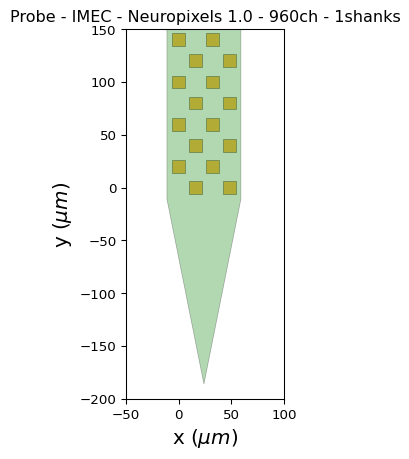

<span class="theorem-title">**Exercise 10**</span> Get the `"1S256"`
probe from `"plexon"`

``` python
manufacturer = 'plexon'
probe_name = '1S256'
probe = pi.get_probe(manufacturer, probe_name)
probe
```

    Probe - Plexon-SiNAPS - 1S256 - 256ch - 1shanks

<span class="theorem-title">**Exercise 11**</span> Plot the probe and
adjust the axis limits to display the probe’s tip

``` python
fig, ax = plt.subplots()
plot_probe(probe, ax=ax)
ax.set(xlim=(-50, 75), ylim=(-150, 150))
```

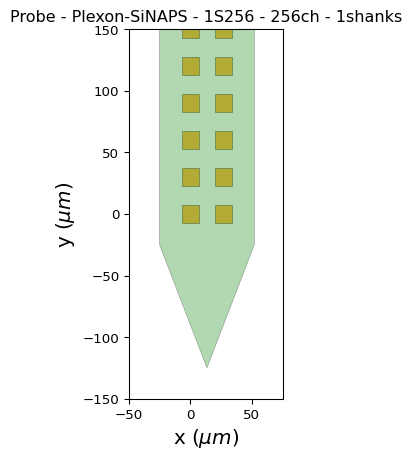

<span class="theorem-title">**Exercise 12**</span> Go to the
[ProbeInterface
library](https://github.com/SpikeInterface/probeinterface_library/tree/main)
and select a new manufacturer and probe from there. Then, get the probe
and plot it

``` python
probe = pi.get_probe("neuronexus", "A4x8-5mm-100-200-177")
fig, ax = plt.subplots()
plot_probe(probe, ax=ax)
ax.set(xlim=(-50, 50), ylim=(-80, 150))
```

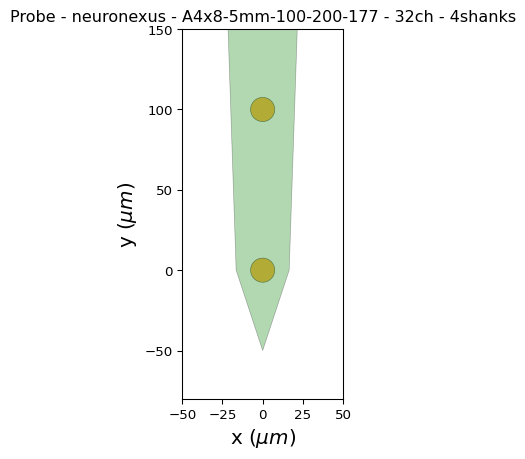

<span class="theorem-title">**Example 7**</span> Load the
`"ASSY-236-H5"` probe from `"cambridgeneurotech"` and remap the channels
for the `"cambridgeneurotech_mini-amp-64"` wiring pathway. Then, plot
the probe with the contact and device indices and adjust the axis limit
to view the tip of the probe.

``` python
probe = pi.get_probe("cambridgeneurotech", "ASSY-236-H5")
probe.wiring_to_device("cambridgeneurotech_mini-amp-64")

fig, ax = plt.subplots()
plot_probe(probe, ax=ax, with_contact_id=True, with_device_index=True)
ax.set(xlim=(-25, 50), ylim=(-50, 150))
```

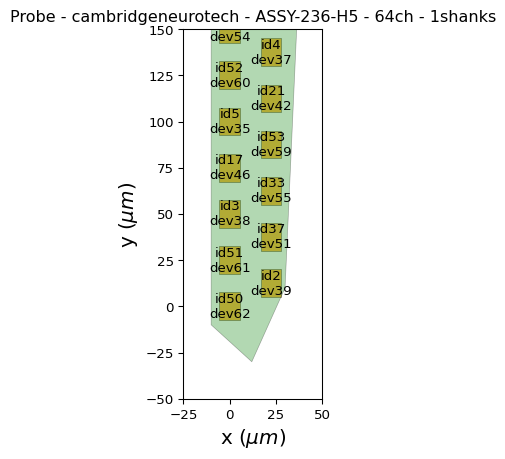

<span class="theorem-title">**Exercise 13**</span> Load the
`"ASSY-236-H5"` probe from `"cambridgeneurotech"` and remap the channels
for the `"ASSY-156>RHD2164"` wiring pathway. Then, plot the probe with
the contact and device indices and adjust the axis limit to view the tip
of the probe.

``` python
probe = pi.get_probe("cambridgeneurotech", "ASSY-236-H5")
probe.wiring_to_device("ASSY-156>RHD2164")

fig, ax = plt.subplots()
plot_probe(probe, ax=ax, with_contact_id=True, with_device_index=True)
ax.set(xlim=(-25, 50), ylim=(-50, 150))
```

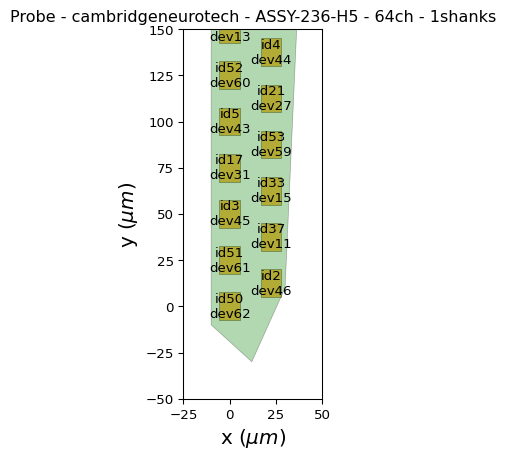

<span class="theorem-title">**Exercise 14**</span> List all of the
available wiring pathways. Select one and apply it to the
`"ASSY-236-H5"` probe from `"cambridgeneurotech"` and plot the probe
(NOTE: not all wiring pathways are compatible with every device).

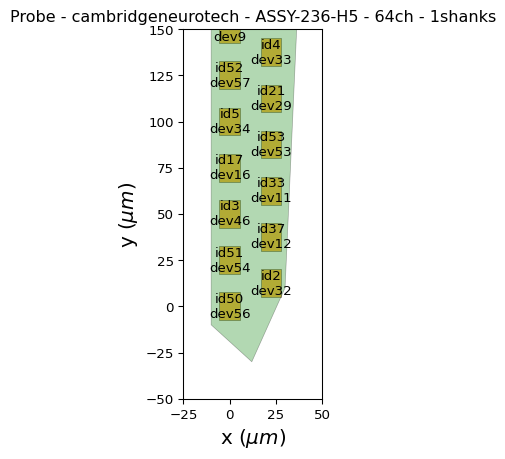

In [25]:
pi.get_available_pathways()
probe = pi.get_probe("cambridgeneurotech", "ASSY-236-H5")
probe.wiring_to_device("ASSY-77>Adpt.A64-Om32_2x-sm-NN>two_RHD2132")

fig, ax = plt.subplots()
plot_probe(probe, ax=ax, with_contact_id=True, with_device_index=True)
ax.set(xlim=(-25, 50), ylim=(-50, 150))

<span class="theorem-title">**Exercise 15**</span> Add the `probe` to
the recording `rec` using `.set_probe()` and then call `.get_probe()`
method to verify the probe info was added to the recording.

``` python
rec = rec.set_probe(probe)
rec.get_probe()
```

    Probe - 64ch - 1shanks

## 3 Spike Sorting

| Code | Description |
|------------------------------------|------------------------------------|
| `si.installed_sorters()` | List all sorters installed in the current environment |
| `results = si.run_sorter(sorter_name, recording, folder)` | Apply a spike sorter to the `recordings`, save the results to the output `folder` and assign the returned object to a variable `results` |
| `results.get_num_units()` | Get the number of units in the spike sorting `results` |

------------------------------------------------------------------------

<span class="theorem-title">**Example 8**</span> Run the code below to
load the recording, and add the probe information to it.

``` python
rec = si.read_openephys(data_dir, stream_id="0")
probe = pi.get_probe("cambridgeneurotech", "ASSY-236-H5")
probe.wiring_to_device("cambridgeneurotech_mini-amp-64")
rec = rec.set_probe(probe)
```

<span class="theorem-title">**Exercise 16**</span> List all of the
installed spike sorters

``` python
si.installed_sorters()
```

    ['simple', 'spykingcircus2', 'tridesclous2']

<span class="theorem-title">**Example 9**</span> Select the first 30
seconds of the recording `rec` and run the spike sorter `"tridesclous2"`
on the recording segment `seg`. Then, print the number of detected units
(NOTE: if running the sorter takes too long, reduce the duration of
`seg`).

``` python
t_start = 0
t_stop = 30
fs = rec.get_sampling_frequency()
seg = rec.frame_slice(start_frame=t_start * fs, end_frame=t_stop * fs)
sorting_TDC = si.run_sorter(
    sorter_name="tridesclous2",
    recording=seg,
    folder="results_TDC",
    remove_existing_folder=True,
)
sorting_TDC.get_num_units()
```

    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/spikeinterface/core/baserecordingsnippets.py:268: UserWarning: There is no Probe attached to this recording. Creating a dummy one with contact positions
      warn("There is no Probe attached to this recording. Creating a dummy one with contact positions")

    57

<span class="theorem-title">**Exercise 17**</span> Run the spike sorter
`"tridesclous2"` on the next 30 seconds of the recording `rec` and print
the number of detected units (HINT: you’ll either have to use a
different `folder` or pass `remove_existing_folder=True`)

``` python
t_start = 30
t_stop = 60
fs = rec.get_sampling_frequency()
seg = rec.frame_slice(start_frame=t_start * fs, end_frame=t_stop * fs)
sorting_TDC = si.run_sorter(
    sorter_name="tridesclous2",
    recording=seg,
    remove_existing_folder=True,
    folder="results_TDC",
)
sorting_TDC.get_num_units()
```

    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/spikeinterface/core/baserecordingsnippets.py:268: UserWarning: There is no Probe attached to this recording. Creating a dummy one with contact positions
      warn("There is no Probe attached to this recording. Creating a dummy one with contact positions")

    61

<span class="theorem-title">**Exercise 18**</span> Run the spike sorter
`"simple"` on the whole recording `rec`. Then, print the number of
detected units.

``` python
sorting_SMP = si.run_sorter(
    sorter_name="simple",
    recording=rec,
    remove_existing_folder=True,
    folder="results_SMP",
)
sorting_SMP.get_num_units()
```

``` json
{"model_id":"e8e75e7c48444ad495070f73c0a05e76","version_major":2,"version_minor":0,"quarto_mimetype":"application/vnd.jupyter.widget-view+json"}
```

    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(

    0

## 4 Setting Sorting Parameters

| Code | Description |
|------------------------------------|------------------------------------|
| `si.get_default_sorter_params(sorter_name)` | Get the default parmeters for a given spike sorter |

------------------------------------------------------------------------

<span class="theorem-title">**Exercise 19**</span> Get the default
parameters for the spike sorter `"tridesclous2"`

``` python
si.get_default_sorter_params("tridesclous2")
```

    {'apply_preprocessing': True,
     'apply_motion_correction': False,
     'motion_correction': {'preset': 'nonrigid_fast_and_accurate'},
     'cache_preprocessing': {'mode': 'memory',
      'memory_limit': 0.5,
      'delete_cache': True},
     'waveforms': {'ms_before': 0.5, 'ms_after': 1.5, 'radius_um': 120.0},
     'filtering': {'freq_min': 300.0, 'freq_max': 8000.0},
     'detection': {'peak_sign': 'neg',
      'detect_threshold': 5,
      'exclude_sweep_ms': 1.5,
      'radius_um': 150.0},
     'selection': {'n_peaks_per_channel': 5000, 'min_n_peaks': 20000},
     'svd': {'n_components': 6},
     'clustering': {'recursive_depth': 3,
      'split_radius_um': 40.0,
      'clusterer': 'hdbscan',
      'clusterer_kwargs': {'min_cluster_size': 10,
       'min_samples': 1,
       'allow_single_cluster': True,
       'cluster_selection_method': 'eom'},
      'do_merge': True,
      'merge_radius_um': 40.0,
      'threshold_diff': 1.5},
     'templates': {'ms_before': 2.0,
      'ms_after': 3.0,
      'max_spikes_per_unit': 400,
      'sparsity_threshold': 1.5},
     'matching': {'method': 'wobble', 'method_kwargs': {}},
     'job_kwargs': {'n_jobs': -1},
     'save_array': True}

<span class="theorem-title">**Example 10**</span> Run the spike sorter
`"tridesclous2"` on the first 30 seconds of the recording `rec` and set
the `detection` parameter to
`{"peak_sign": "neg", "detect_threshold":7, "exclude_sweep_ms":1.5}`.
Then, print the number of detected units.

``` python
t_start = 0
t_stop = 30
fs = rec.get_sampling_frequency()
seg = rec.frame_slice(start_frame=t_start * fs, end_frame=t_stop * fs)

detection = {"peak_sign": "neg", "detect_threshold":7, "exclude_sweep_ms":1.5}
sorting_TDC = si.run_sorter(
    sorter_name="tridesclous2",
    recording=seg,
    folder="results_TDC",
    remove_existing_folder=True,
    detection=detection,
)
sorting_TDC.get_num_units()
```

    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/spikeinterface/core/baserecordingsnippets.py:268: UserWarning: There is no Probe attached to this recording. Creating a dummy one with contact positions
      warn("There is no Probe attached to this recording. Creating a dummy one with contact positions")

    51

<span class="theorem-title">**Exercise 20**</span> Run the spike sorter
`"tridesclous2"` on the first 30 seconds of the recording `rec` and set
the `filtering` parameter to `{"freq_min": 1000, "freq_max":9000}`.
Then, print the number of detected units.

``` python
t_start = 0
t_stop = 30
fs = rec.get_sampling_frequency()
seg = rec.frame_slice(start_frame=t_start * fs, end_frame=t_stop * fs)

filtering = {"freq_min": 1000, "freq_max": 9000}
sorting_TDC = si.run_sorter(
    sorter_name="tridesclous2",
    recording=seg,
    folder="results_TDC",
    remove_existing_folder=True,
    filtering=filtering,
)
sorting_TDC.get_num_units()
```

    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/spikeinterface/core/baserecordingsnippets.py:268: UserWarning: There is no Probe attached to this recording. Creating a dummy one with contact positions
      warn("There is no Probe attached to this recording. Creating a dummy one with contact positions")

    58

<span class="theorem-title">**Exercise 21**</span> Run the spike sorter
`"tridesclous2"` on the segment `seg`

``` python
sorting_TDC = si.run_sorter(
    sorter_name="tridesclous2",
    recording=seg,
    folder="results_TDC",
    remove_existing_folder=True,
    filtering=filtering,
    detection=detection
)
sorting_TDC.get_num_units()
```

    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/spikeinterface/core/baserecordingsnippets.py:268: UserWarning: There is no Probe attached to this recording. Creating a dummy one with contact positions
      warn("There is no Probe attached to this recording. Creating a dummy one with contact positions")

    37

<span class="theorem-title">**Exercise 22**</span> Get the default
parameters for the spike sorter `"spykingcircus2"`

``` python
si.get_default_sorter_params("spykingcircus2")
```

    {'general': {'ms_before': 2, 'ms_after': 2, 'radius_um': 100},
     'sparsity': {'method': 'snr',
      'amplitude_mode': 'peak_to_peak',
      'threshold': 0.25},
     'filtering': {'freq_min': 150,
      'freq_max': 7000,
      'ftype': 'bessel',
      'filter_order': 2,
      'margin_ms': 10},
     'whitening': {'mode': 'local', 'regularize': False},
     'detection': {'method': 'matched_filtering',
      'method_kwargs': {'peak_sign': 'neg', 'detect_threshold': 5}},
     'selection': {'method': 'uniform',
      'method_kwargs': {'n_peaks_per_channel': 5000,
       'min_n_peaks': 100000,
       'select_per_channel': False}},
     'apply_motion_correction': True,
     'motion_correction': {'preset': 'dredge_fast'},
     'merging': {'max_distance_um': 50},
     'clustering': {'method': 'circus', 'method_kwargs': {}},
     'matching': {'method': 'circus-omp-svd', 'method_kwargs': {}},
     'apply_preprocessing': True,
     'templates_from_svd': True,
     'cache_preprocessing': {'mode': 'memory',
      'memory_limit': 0.5,
      'delete_cache': True},
     'multi_units_only': False,
     'job_kwargs': {'n_jobs': 0.75},
     'seed': 42,
     'debug': False}

<span class="theorem-title">**Exercise 23**</span> Run the spike sorter
`"spykingcircus2"` on the first 30 seconds of the recording `rec` and
set the `motion_correction` parameter to `{"preset":"rigid_fast"}`.
Then, print the number of detected units.

``` python
t_start = 0
t_stop = 30
fs = rec.get_sampling_frequency()
seg = rec.frame_slice(start_frame=t_start * fs, end_frame=t_stop * fs)

sorting_SPC = si.run_sorter(
    sorter_name="spykingcircus2",
    recording=rec,
    folder="results_SPC",
    remove_existing_folder=True,
    motion_correction={"preset": "rigid_fast"},
)
sorting_SPC.get_num_units()
```

``` json
{"model_id":"9d715b2dcff54c678bedcf065b0c88c7","version_major":2,"version_minor":0,"quarto_mimetype":"application/vnd.jupyter.widget-view+json"}
```

    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
      warnings.warn(
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/spikeinterface/core/baserecordingsnippets.py:268: UserWarning: There is no Probe attached to this recording. Creating a dummy one with contact positions
      warn("There is no Probe attached to this recording. Creating a dummy one with contact positions")
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/spikeinterface/core/baserecordingsnippets.py:268: UserWarning: There is no Probe attached to this recording. Creating a dummy one with contact positions
      warn("There is no Probe attached to this recording. Creating a dummy one with contact positions")
    /home/olebi/courses/Intro-to-Neural-Spike-Analysis-in-Python/.pixi/envs/render/lib/python3.12/site-packages/spikeinterface/core/sortinganalyzer.py:431: UserWarning: The Recording is not serializable! The recording link will be lost for future load
      warnings.warn("The Recording is not serializable! The recording link will be lost for future load")

    73